# Neural Network Image Classifier

In This tutorial we will build an Image Classifier for the MNIST Data Set using a Neural Network

First, we will import the MNIST Handwritten digits data.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Understanding our Dataset

Recall that the MNIST Handwritten Digits Dataset is a collection of images of handwritten digits. These images are all 28 by 28 pixels and are in grayscale instead of RGB. The dataset from the tensorflow library has 3 sets of images. Each of them have associated labels, and each set has a different number of images.

In [2]:
for i in range(0, len(mnist)):
    print('# of images in image set %d: ' % (i + 1), len(mnist[i].images))

# of images in image set 1:  55000
# of images in image set 2:  5000
# of images in image set 3:  10000


Below we are using matplotlib to display the first dataset's first image. We are also printing out the label associated with this image. Clearly the image looks like the number 7, And thus the label is an array of 0s where the 7th index is a 1.

Label of this image:  [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


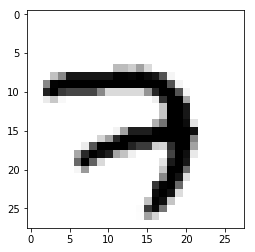

In [3]:
plt.imshow(mnist[0].images[0].reshape((28, 28)), cmap="Greys")
print('Label of this image: ', mnist[0].labels[0])

## Building the Neural Network
Now that we understand our dataset, lets start building a neural network to classify it. First, we need to define the image size, and number of classes. Then, we need to define our input and output tensors according to the image size and number of classes. Since we will be performing matrix multiplication with our tensors, we must make them of rank 2.

In [4]:
image_size = 28 * 28
classes = 10 

x = tf.placeholder('float32', [None, image_size])
y = tf.placeholder('float32', [None, classes])

print(x, y)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


Recall that a neural network has weights from each node in one layer to each node in the next layer, and a bias from one layer to each node in the next layer. We will construct a neural network with only one hidden layer with 256 nodes.

In [5]:
weights = {'input_to_h1': tf.Variable(tf.random_normal([image_size, 256])), 
           'h1_to_output': tf.Variable(tf.random_normal([256, classes]))}

biases = { 'input_to_h1': tf.Variable(tf.random_normal([256])), 
           'h1_to_output': tf.Variable(tf.random_normal([classes]))}

Now that we have randomly initialized weights and biases, we can construct a tensor to represent the entire neural network. Recall that a neural network performs matrix multiplication on the incoming nodes with their weights, so we will use tf.matmul to perform that operation. Note that this is synonymous to the 'linear_model = weights * x + bias' tensor we had in the introduction.

In [6]:
hidden_layer = tf.add(tf.matmul(x, weights['input_to_h1']), biases['input_to_h1'])
output_layer = tf.add(tf.matmul(hidden_layer, weights['h1_to_output']), biases['h1_to_output'])


## Training a Neural Network
Now that we have our basic model built, we should define an error tensor and a gradient_descent tensor, so that we can build a training tensor.

In [7]:
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output_layer, labels = y))
gradient_descent = tf.train.GradientDescentOptimizer(0.01)
train = gradient_descent.minimize(error)

It will be helpful to measure the accuracy of the model while training it so that we can interpret the performance of the neural network, so we can construct an accuracy tensor by checking whether or not our model determined the correct class.

In [8]:
prediction_correct = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
model_accuracy = tf.reduce_mean(tf.cast(prediction_correct, tf.float32))

Now that we have all the pieces of the puzzle together (our model, an optimizer, and a performance measure), we can run our session by running our model's optimizer multiple times over different 'batches' of input data, and printing out the accuracy of our model over our iterations. Note that we are using a variant of gradient descent called mini-batch gradient descent. This is similar to stochastic gradient descent with the exception that instead of updating our model on every data point, we update our model on a small group of our data points. Mini-batch strikes a good balance between performance and speed.

In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(0, 1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, {x: batch_x, y: batch_y})
        if i % 100 == 0 or i == 0:
            loss, acc = sess.run([error, model_accuracy], {x: batch_x, y: batch_y})
            
            print('iteration: ', i, 'Network Accuracy: ', sess.run(model_accuracy, {x: batch_x, y: batch_y}))
            
    print('Gradient Descent complete')
    
    print('testing acc: ', sess.run(model_accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

iteration:  0 Network Accuracy:  0.04
iteration:  100 Network Accuracy:  0.72
iteration:  200 Network Accuracy:  0.81
iteration:  300 Network Accuracy:  0.81
iteration:  400 Network Accuracy:  0.81
iteration:  500 Network Accuracy:  0.77
iteration:  600 Network Accuracy:  0.91
iteration:  700 Network Accuracy:  0.76
iteration:  800 Network Accuracy:  0.88
iteration:  900 Network Accuracy:  0.83
Gradient Descent complete
testing acc:  0.8524


Congratulations, you have built your first Neural Network with TensorFlow!

## Activity 1:

Export a graph of this session to TensorBoard to visualize and understand the network.

## Activity 2:
Tune the parameters (learning rate, # of iterations, # of images read, # of hidden layers, # of nodes in hidden layers, activation functions, etc), in order to maximize the accuracy of your network. Try to beat a base test accuracy of 93%

### Potential Solution:

- Adding one more hidden layer with same # of hidden nodes (256)
- Applying relu to both hidden layers
- Reducing the learning rate
- Increasing the # batches to 30000

In [10]:
image_size = 28 * 28
classes = 10 
hidden_layer_size = 256

x = tf.placeholder('float32', [None, image_size])
y = tf.placeholder('float32', [None, classes])

weights = {'input_to_h1': tf.Variable(tf.random_normal([image_size, hidden_layer_size])), 
           'h1_to_h2': tf.Variable(tf.random_normal([hidden_layer_size, hidden_layer_size])),
           'h2_to_output': tf.Variable(tf.random_normal([hidden_layer_size, classes]))}

biases = { 'input_to_h1': tf.Variable(tf.random_normal([hidden_layer_size])), 
           'h1_to_h2': tf.Variable(tf.random_normal([hidden_layer_size])),
           'h2_to_output': tf.Variable(tf.random_normal([classes]))}

hidden_layer1 = tf.add(tf.matmul(x, weights['input_to_h1']), biases['input_to_h1'])
hidden_layer1 = tf.nn.relu(hidden_layer1)
hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['h1_to_h2']), biases['h1_to_h2'])
hidden_layer2 = tf.nn.relu(hidden_layer2)
output_layer = tf.add(tf.matmul(hidden_layer2, weights['h2_to_output']), biases['h2_to_output'])

error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output_layer, labels = y))
gradient_descent = tf.train.GradientDescentOptimizer(0.005)
train = gradient_descent.minimize(error)

prediction_correct = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
model_accuracy = tf.reduce_mean(tf.cast(prediction_correct, tf.float32))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(0, 30000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, {x: batch_x, y: batch_y})
        if i % 1000 == 0 or i == 0:
            loss, acc = sess.run([error, model_accuracy], {x: batch_x, y: batch_y})
            
            print('iteration: ', i, 'Network Accuracy: ', sess.run(model_accuracy, {x: batch_x, y: batch_y}))
            
    print('Gradient Descent complete')
    
    print('testing acc: ', sess.run(model_accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

iteration:  0 Network Accuracy:  0.22
iteration:  1000 Network Accuracy:  0.94
iteration:  2000 Network Accuracy:  0.92
iteration:  3000 Network Accuracy:  0.98
iteration:  4000 Network Accuracy:  0.92
iteration:  5000 Network Accuracy:  0.99
iteration:  6000 Network Accuracy:  0.93
iteration:  7000 Network Accuracy:  0.99
iteration:  8000 Network Accuracy:  0.99
iteration:  9000 Network Accuracy:  1.0
iteration:  10000 Network Accuracy:  0.99
iteration:  11000 Network Accuracy:  0.99
iteration:  12000 Network Accuracy:  0.99
iteration:  13000 Network Accuracy:  0.99
iteration:  14000 Network Accuracy:  0.99
iteration:  15000 Network Accuracy:  0.98
iteration:  16000 Network Accuracy:  1.0
iteration:  17000 Network Accuracy:  1.0
iteration:  18000 Network Accuracy:  1.0
iteration:  19000 Network Accuracy:  1.0
iteration:  20000 Network Accuracy:  1.0
iteration:  21000 Network Accuracy:  0.98
iteration:  22000 Network Accuracy:  1.0
iteration:  23000 Network Accuracy:  1.0
iteration:  2